In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

In [2]:
X, Y = make_classification(n_samples=1250, n_features=4, n_informative=2, random_state=0)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [4]:
from sklearn.linear_model import SGDClassifier

In [5]:
sgd = SGDClassifier(loss="log_loss")

In [6]:
sgd.fit(X_train, Y_train)

SGDClassifier(loss='log_loss')

In [7]:
print("LOSS: %.4f" % (log_loss(Y_test,sgd.predict_proba(X_test))))

LOSS: 0.1129


In [8]:
def minibatchGD(train_set, test_set, n_batches=1, epochs=10):
    X_train, Y_train = train_set
    X_test, Y_test = test_set
    batch_size = X_train.shape[0] / n_batches
    sgd = SGDClassifier(loss="log_loss")
    sgd_loss = []

    for epoch in range(epochs):
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch * batch_size)
            batch_end = int((batch+1) * batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]
            sgd.partial_fit(X_batch, Y_batch, classes=np.unique(Y_train))
            loss = log_loss(Y_test, sgd.predict_proba(X_test), labels=np.unique(Y_train))
            sgd_loss.append(loss)
        print("Loss all'epoca %d = %.4f" % (epoch+1,loss))
    return(sgd, sgd_loss)

### Full Gradient Descend

In [9]:
full_gd, full_gd_loss = minibatchGD((X_train,Y_train), (X_test,Y_test), n_batches=1, epochs=200)

Loss all'epoca 1 = 0.6551
Loss all'epoca 2 = 0.6270
Loss all'epoca 3 = 0.4018
Loss all'epoca 4 = 0.3039
Loss all'epoca 5 = 0.2813
Loss all'epoca 6 = 0.1684
Loss all'epoca 7 = 0.1571
Loss all'epoca 8 = 0.2156
Loss all'epoca 9 = 0.1763
Loss all'epoca 10 = 0.1299
Loss all'epoca 11 = 0.1188
Loss all'epoca 12 = 0.1438
Loss all'epoca 13 = 0.1336
Loss all'epoca 14 = 0.1290
Loss all'epoca 15 = 0.1334
Loss all'epoca 16 = 0.1304
Loss all'epoca 17 = 0.1539
Loss all'epoca 18 = 0.1897
Loss all'epoca 19 = 0.1424
Loss all'epoca 20 = 0.1601
Loss all'epoca 21 = 0.1237
Loss all'epoca 22 = 0.1153
Loss all'epoca 23 = 0.1136
Loss all'epoca 24 = 0.1158
Loss all'epoca 25 = 0.1091
Loss all'epoca 26 = 0.1079
Loss all'epoca 27 = 0.1068
Loss all'epoca 28 = 0.1402
Loss all'epoca 29 = 0.1105
Loss all'epoca 30 = 0.1100
Loss all'epoca 31 = 0.1185
Loss all'epoca 32 = 0.1092
Loss all'epoca 33 = 0.1087
Loss all'epoca 34 = 0.1159
Loss all'epoca 35 = 0.1245
Loss all'epoca 36 = 0.1203
Loss all'epoca 37 = 0.1129
Loss all'e

In [10]:
sgd, sgd_loss = minibatchGD((X_train,Y_train), (X_test,Y_test), n_batches=X_train.shape[0], epochs=5)

Loss all'epoca 1 = 0.7180
Loss all'epoca 2 = 0.5092
Loss all'epoca 3 = 0.3298
Loss all'epoca 4 = 0.2033
Loss all'epoca 5 = 0.5947


### Mini Gradient Descend

In [11]:
mini_gd, mini_gd_loss = minibatchGD((X_train,Y_train), (X_test,Y_test), n_batches=10, epochs=50)

Loss all'epoca 1 = 0.6270
Loss all'epoca 2 = 1.8659
Loss all'epoca 3 = 0.4736
Loss all'epoca 4 = 0.2238
Loss all'epoca 5 = 0.2840
Loss all'epoca 6 = 0.2433
Loss all'epoca 7 = 0.3944
Loss all'epoca 8 = 0.2802
Loss all'epoca 9 = 0.1729
Loss all'epoca 10 = 0.3396
Loss all'epoca 11 = 0.1350
Loss all'epoca 12 = 0.1237
Loss all'epoca 13 = 0.1431
Loss all'epoca 14 = 0.1096
Loss all'epoca 15 = 0.1118
Loss all'epoca 16 = 0.1293
Loss all'epoca 17 = 0.1306
Loss all'epoca 18 = 0.1153
Loss all'epoca 19 = 0.1283
Loss all'epoca 20 = 0.1155
Loss all'epoca 21 = 0.1195
Loss all'epoca 22 = 0.1252
Loss all'epoca 23 = 0.1135
Loss all'epoca 24 = 0.1213
Loss all'epoca 25 = 0.1246
Loss all'epoca 26 = 0.1087
Loss all'epoca 27 = 0.1154
Loss all'epoca 28 = 0.1139
Loss all'epoca 29 = 0.1265
Loss all'epoca 30 = 0.1114
Loss all'epoca 31 = 0.1183
Loss all'epoca 32 = 0.1074
Loss all'epoca 33 = 0.1237
Loss all'epoca 34 = 0.1089
Loss all'epoca 35 = 0.1200
Loss all'epoca 36 = 0.1094
Loss all'epoca 37 = 0.1120
Loss all'e

In [12]:
plt.rcParams['figure.figsize'] = (14,10)

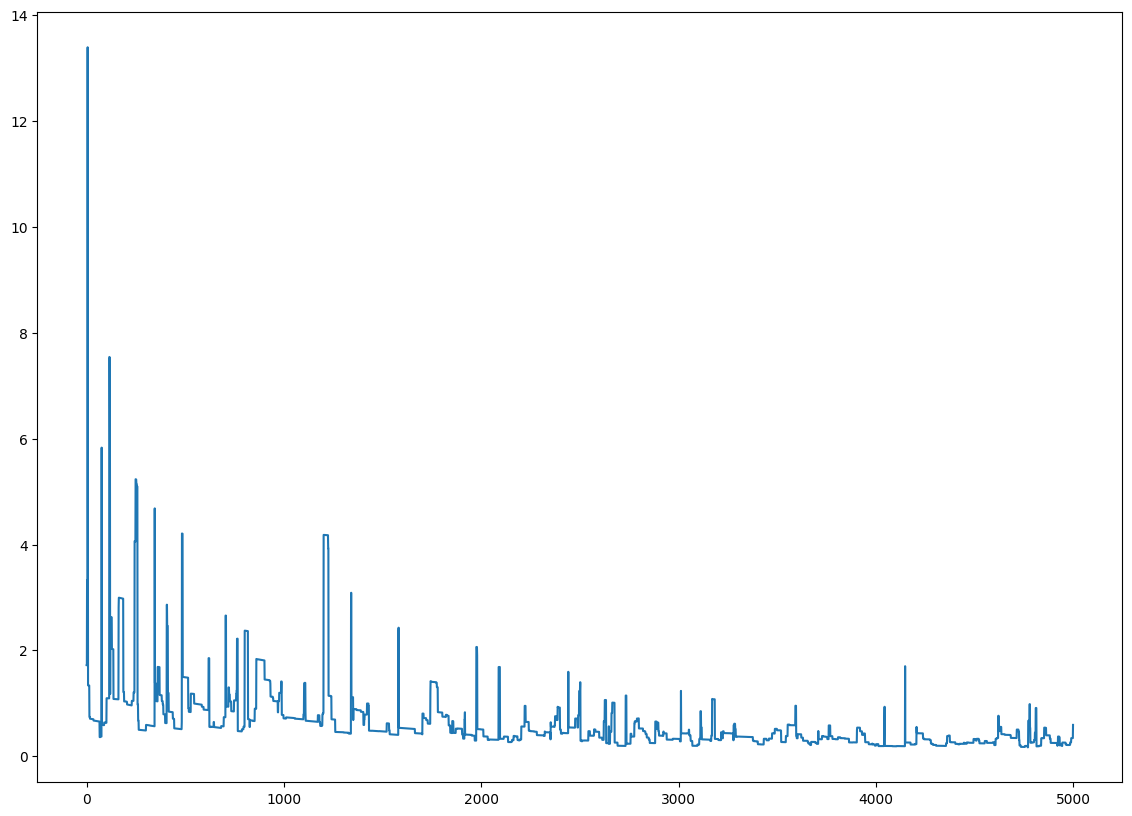

In [15]:
plt.plot(sgd_loss, label="Stochastic")

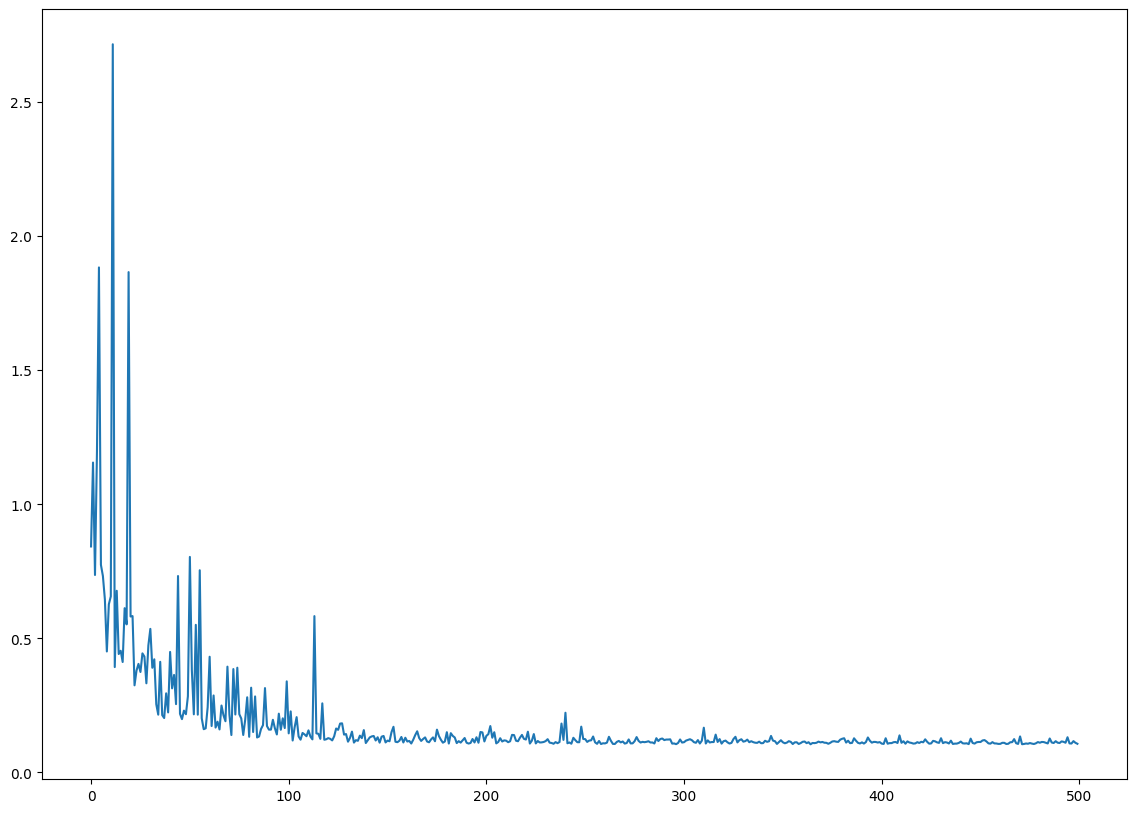

In [16]:
plt.plot(mini_gd_loss, label="Mini Batch")

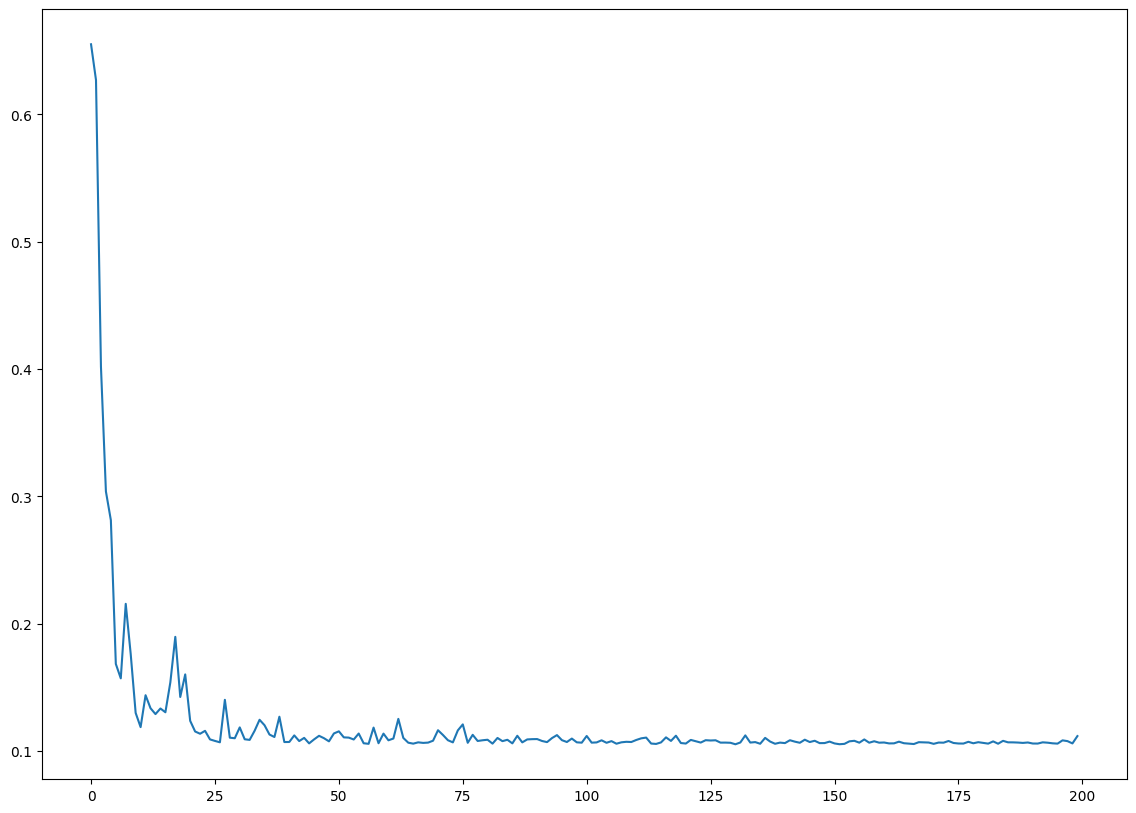

In [17]:
plt.plot(full_gd_loss, label="Full Batch")

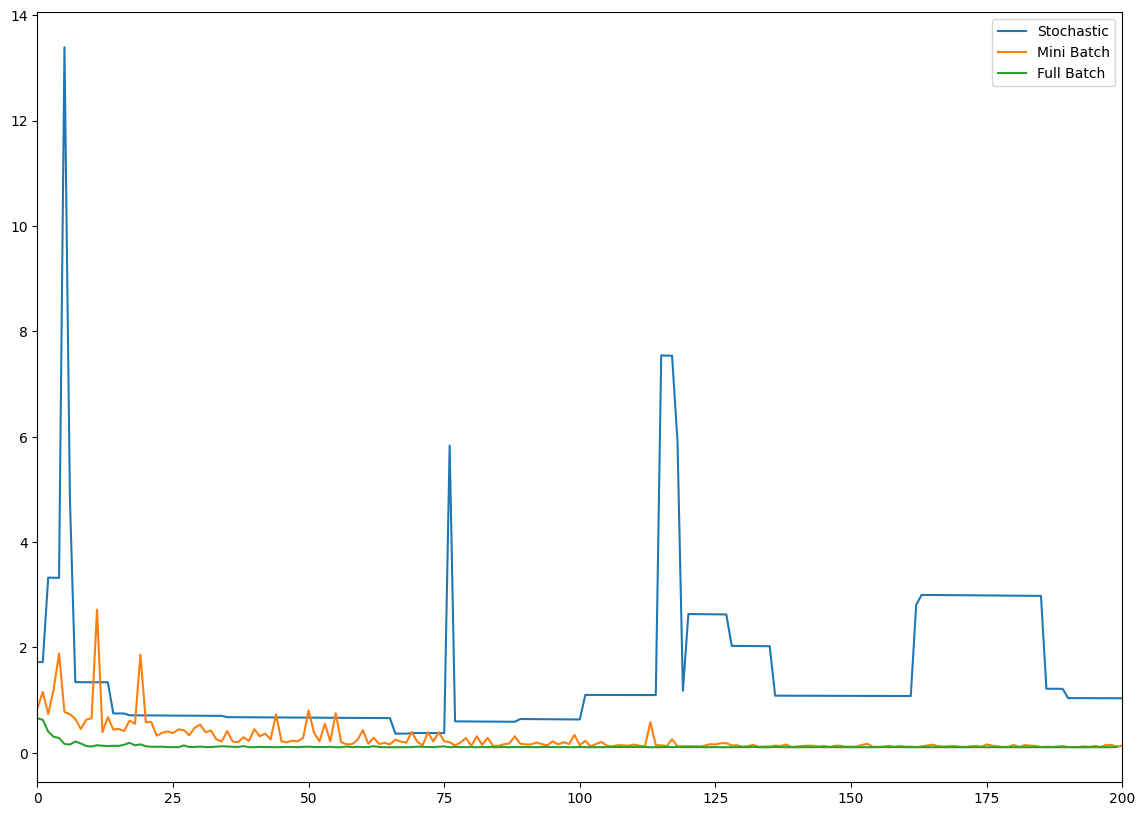

In [18]:
plt.plot(sgd_loss, label="Stochastic")
plt.plot(mini_gd_loss, label="Mini Batch")
plt.plot(full_gd_loss, label="Full Batch")
plt.xlim(xmin=0, xmax=200)
plt.legend()